## Using Chicago Open Data Portal
download data Car Crahses

https://data.cityofchicago.org/Public-Safety/Crimes-2018/3i3m-jwuy

* export button, save as a csv file.

## Objective where the worst place to park in Chicago.
+ to learning basic sci kit learn preprocessing
+ learn k means clustering
+ to install run from command prompt 'pip install scikit-learn'
+ to learn standard data science work flow


In [2]:
# after you have downloaded data, load it into pytho
import pandas as pd 
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import numpy as np

#suppres science notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)
file_path = '../data/Crimes_-_2018.csv'
data = pd.read_csv(file_path)
print(data.shape)
#data = data.sample(10000)
# if you are unsure where the file is
# import os
# os.listdir() # lists files in the working directory where python is.

(267914, 22)


In [3]:
# generally desribe the data
print(data.shape)
data.describe()


(267914, 22)


,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,267914.00000,267914.00000,267914.00000,267910.00000,267912.00000,263435.00000,263435.00000,267914.00000,263435.00000,263435.00000
mean,11352951.01278,1142.50346,11.19691,23.44406,36.47569,1165007.24768,1886592.00402,2018.00000,41.84440,-87.66998
std,542118.55253,696.05172,6.95306,14.08828,21.45531,16037.27204,31184.94043,0.00000,0.08576,0.05839
min,23757.00000,111.00000,1.00000,1.00000,0.00000,1092706.00000,1813897.00000,2018.00000,41.64459,-87.93427
25%,11286826.25000,611.00000,6.00000,10.00000,23.00000,1153331.00000,1859419.00000,2018.00000,41.76965,-87.71239
50%,11376432.50000,1031.00000,10.00000,24.00000,32.00000,1166911.00000,1894243.00000,2018.00000,41.86558,-87.66328
75%,11466098.50000,1723.00000,17.00000,35.00000,53.00000,1176456.50000,1908737.00000,2018.00000,41.90533,-87.62784
max,11991291.00000,2535.00000,31.00000,50.00000,77.00000,1205119.00000,1951535.00000,2018.00000,42.02267,-87.52453


In [4]:
# find what types of crime are in the dat set
set(data['Primary Type'])

{'ARSON',
 'ASSAULT',
 'BATTERY',
 'BURGLARY',
 'CONCEALED CARRY LICENSE VIOLATION',
 'CRIM SEXUAL ASSAULT',
 'CRIMINAL DAMAGE',
 'CRIMINAL TRESPASS',
 'DECEPTIVE PRACTICE',
 'GAMBLING',
 'HOMICIDE',
 'HUMAN TRAFFICKING',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'INTIMIDATION',
 'KIDNAPPING',
 'LIQUOR LAW VIOLATION',
 'MOTOR VEHICLE THEFT',
 'NARCOTICS',
 'NON-CRIMINAL',
 'NON-CRIMINAL (SUBJECT SPECIFIED)',
 'OBSCENITY',
 'OFFENSE INVOLVING CHILDREN',
 'OTHER NARCOTIC VIOLATION',
 'OTHER OFFENSE',
 'PROSTITUTION',
 'PUBLIC INDECENCY',
 'PUBLIC PEACE VIOLATION',
 'ROBBERY',
 'SEX OFFENSE',
 'STALKING',
 'THEFT',
 'WEAPONS VIOLATION'}

In [5]:
# filter the data set down to only 

data = data.loc[data['Primary Type'] == 'MOTOR VEHICLE THEFT',:]
print(data.shape)
print(data.shape)

(9984, 22)
(9984, 22)


In [6]:

data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
67,11292401,JB233394,04/22/2018 03:30:00 AM,0000X E CERMAK RD,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,True,False,...,3.00000,33.00000,07,1177314.00000,1889769.00000,2018,02/11/2020 03:48:28 PM,41.85286,-87.62468,"(41.852860198, -87.624682442)"
162,11370073,JB336168,07/04/2018 03:00:00 PM,071XX S CORNELL AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,7.00000,43.00000,07,1188477.00000,1857730.00000,2018,01/21/2020 03:49:17 PM,41.76468,-87.58474,"(41.764682991, -87.58473567)"
210,11944504,JD107341,12/28/2018 12:01:00 AM,034XX W ADDISON ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT/GARAGE(NON.RESID.),False,False,...,35.00000,21.00000,07,nan,nan,2018,01/08/2020 03:49:48 PM,nan,nan,NaN
260,11402045,JB377373,08/03/2018 01:00:00 AM,045XX S CHAMPLAIN AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,True,False,...,4.00000,38.00000,07,1181465.00000,1875137.00000,2018,12/28/2019 03:49:46 PM,41.81261,-87.60990,"(41.812613963, -87.609899424)"
353,11427738,JB410883,08/26/2018 07:00:00 PM,068XX S TALMAN AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,17.00000,66.00000,07,1159890.00000,1859150.00000,2018,11/29/2019 03:46:54 PM,41.76921,-87.68948,"(41.769214621, -87.689475966)"


In [7]:
data.shape

(9984, 22)

#### Cluster Model Pipelineing
Cluster models need columns to be on the same scale,  Since lat is on -90-90 and long is on 0-180, then the data is rescaled


The standard scaler and kmeans model are pipelined together, and then a Column transformer is used to ensure the correct lat and lon cols are being predicted with

In [31]:

# create a list of lat lon columns
lat_lon_cols = ['Latitude', 'Longitude']

# remote columns where lat and lon are None
data = data.dropna(subset=lat_lon_cols)

# scale the data
scaler = StandardScaler()
data_scaled  = scaler.fit_transform(data[lat_lon_cols])


# create clusterin pipeline linking the scaler to the model
steps = [('scale', scaler)]
cluster_pipe = Pipeline(steps)

# ad column selection to pipeline 
pipe = ColumnTransformer(transformers=[('cluster_pipe', cluster_pipe, lat_lon_cols)]).fit(data)



# preprocess the lat and long columns
X = pipe.transform(data)

# fit the kmeans model on the scaled data 
model = KMeans(n_clusters=20, random_state=10)
model = model.fit(X)

cluster_labels = model.predict(X)
cluster_labels[0:10]


array([12,  7, 16,  8, 13,  8,  8,  8, 19,  7], dtype=int32)

##### Cluster Model Output
THe output of the cluster model is essential a distance to each cluster..
To get the cluster that a row was assigned to, the np.argmin function finds the cluster that is the closest.

In [32]:
# create counts of labels 
## Create Cluster Labels based on frequency
Counter(cluster_labels)
counts = pd.DataFrame(pd.Series(Counter(cluster_labels)))
counts.columns = ['counts']

counts.sort_values('counts', ascending=False).head()

,counts
2,795
13,720
12,708
8,662
3,635


##### Extracting the Centers
Getting the cluster centers, and totals of how many times they occure can be very informative.
Here, the scaler inverse transform is used to get the centers back on a lat lon scale.

In [33]:
 model.cluster_centers_[0:5, :]

array([[-1.84422461,  0.91250952],
       [ 0.72675318, -0.60096883],
       [ 0.15233113, -0.65649369],
       [-0.82438294,  0.28798911],
       [ 1.09422697,  0.32658929]])

In [35]:
### Get the coorindates of the clusters
# get the model's centers 
centers = model.cluster_centers_

# rescale the centers
centers_rescaled = scaler.inverse_transform(centers)

# create a data frame of results
results = pd.DataFrame(centers_rescaled, columns =  ['Latitude','Longitude'], index=np.arange(model.n_clusters))

# merge the counts back to the results,
results = results.merge(counts, how='inner', left_index=True, right_index=True)
results.sort_values(by='counts', ascending=False).head()

,Latitude,Longitude,counts
2,41.85993,-87.71599,795
13,41.89019,-87.75464,720
12,41.88382,-87.63330,708
8,41.78277,-87.69816,662
3,41.77587,-87.65911,635


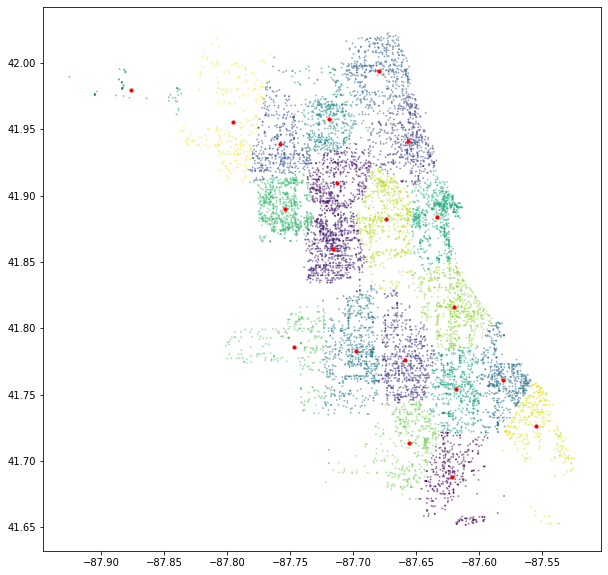

In [36]:
# it always a good idea to plot the clusters
from matplotlib import pyplot as plt
x = data['Longitude']
y = data['Latitude']
colors = cluster_labels
plt.figure(figsize=(10,10))
plt.scatter(x, y,s =1, c=colors, alpha=.4)
plt.scatter(results['Longitude'], results['Latitude'], c ='red',s =10 )


plt.show()
display()


####  Choose number of clusters with silloute method
resources:
+ https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

+ https://en.wikipedia.org/wiki/Silhouette_(clustering)
    
#### What are good Scores ?
+ Scores range between -1 and 1
+ Generally, a score should be positive, and it it's not, that sugggest the cluster boundaries may be arbitrary

+ Score close to 1 imply that points within the each cluster similar to eachother, as well as each cluster is dissimlair to it's next nearest cluster.  Clusters with low or negative values

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html


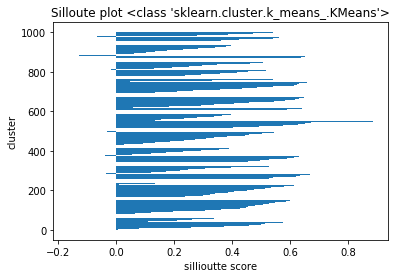

In [41]:

from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.cm import get_cmap

# between -1 and 1, higher number indicates you have good configurations, if you 

# get the s score for each row of data
X = pipe.transform(data.sample(1000))
cluster_labels = model.predict(X)
scores = silhouette_samples(X, cluster_labels)

# create a bar plot to show each silloute
scores_df = pd.DataFrame({'scores':scores, 'labels':cluster_labels})
scores_df.sort_values(['labels', 'scores'], inplace=True)


plt.barh(range(scores_df.shape[0]), scores_df[ 'scores'])
plt.xlabel('sillioutte score')
plt.ylabel('cluster')
plt.title('Silloute plot {}'.format(type(model)))
plt.show()
display()

In [ ]:
silhouette_score(X, cluster_labels)



## Use loops to get the best silloute scores 
since we don't know exactly how many clusters to choose, an approach is to loop through different number of cluster sizes and calcuate the silhouette scores, and find the point at which adding a cluster shows little improvement.

In [42]:
from sklearn.metrics import silhouette_samples, silhouette_score

scores = []
n_clusters = []
for n in range(5, 40, 1):
    model = KMeans(n)
    X = pipe.transform(data.sample(1000))
    cluster_labels = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    scores.append(silhouette_avg)
    n_clusters.append(model.n_clusters)


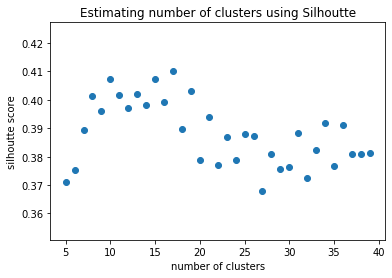

In [43]:
plt.figure()
plt.scatter(n_clusters, scores)
plt.xlabel('number of clusters')
plt.ylabel('silhoutte score')
plt.title('Estimating number of clusters using Silhoutte')
plt.show()

In [44]:
### Density Based Clusters
### Using Parameter Search


from sklearn.cluster import DBSCAN
from sklearn.model_selection import ParameterGrid

# create a parameter list to search over
param = {'eps':list(np.arange(.001, .2, .01)), 'min_samples':list(np.arange(1, 10, 1))}

# create list of every posible parameter combination
param_list = list(ParameterGrid(param))

X = pipe.transform(data.sample(1000))

scores = []
n_clusters = []
best_params = {}
print('building {} models ...'.format(len(param_list)))
for p in param_list:
    try:
        model = DBSCAN(**p)
        model.fit(X)
        cluster_labels = model.labels_
        silhouette_avg = silhouette_score(X, cluster_labels)
        scores.append(silhouette_avg)
        n_clusters.append( len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0))
        if silhouette_avg >= max(scores):
            best_params = p
        
    except:
        pass
print('best params {}'.format(best_params))


building 180 models ...
best params {'eps': 0.05099999999999999, 'min_samples': 1}


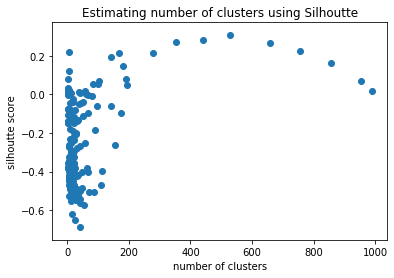

In [45]:
plt.figure()
plt.scatter(n_clusters, scores)
plt.xlabel('number of clusters')
plt.ylabel('silhoutte score')
plt.title('Estimating number of clusters using Silhoutte')
plt.show()

In [46]:
best_model = DBSCAN(**best_params).fit(pipe.transform(data))
cluster_labels = best_model.labels_

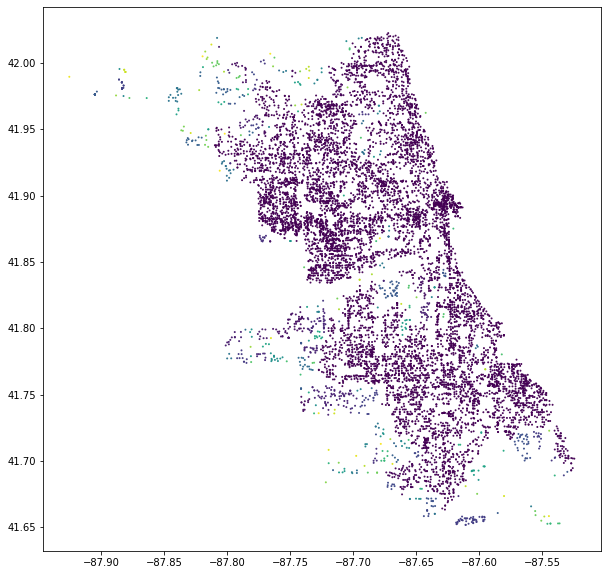

In [47]:
# it always a good idea to plot the clusters
from matplotlib import pyplot as plt
x = data['Longitude']
y = data['Latitude']
colors = cluster_labels
plt.figure(figsize=(10,10))
plt.scatter(x, y,s =1, c=cluster_labels , alpha=.9)


plt.show()
display()

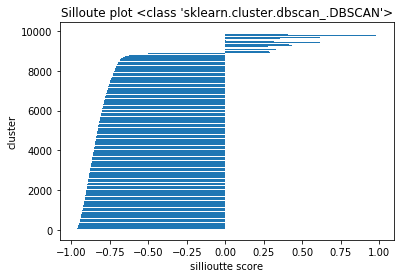

In [49]:
# get the s score for each row of data
X = pipe.transform(data)
scores = silhouette_samples(X, cluster_labels)

# create a bar plot to show each silloute
scores_df = pd.DataFrame({'scores':scores, 'labels':cluster_labels})
scores_df.sort_values(['labels', 'scores'], inplace=True)


plt.barh(range(scores_df.shape[0]), scores_df[ 'scores'])
plt.xlabel('sillioutte score')
plt.ylabel('cluster')
plt.title('Silloute plot {}'.format(type(model)))
plt.show()
display()

In [ ]:
silhouette_score(X, cluster_labels)

#### Hirearchical Clustering
AgglomerativeClustering essentually allows clusters to that are close together to merge, create clusters and clusters within clusters


https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

In [50]:
from sklearn.cluster import AgglomerativeClustering



# create a parameter list to search over
param = {'n_clusters':list(np.arange(5, 20, 1))}

# create list of every posible parameter combination
param_list = list(ParameterGrid(param))

X = pipe.transform(data.sample(1000))

scores = []
n_clusters = []
best_params = {}
print('building {} models ...'.format(len(param_list)))
for p in param_list:
    try:
        model = AgglomerativeClustering(**p)
        model.fit(X)
        cluster_labels = model.labels_
        silhouette_avg = silhouette_score(X, cluster_labels)
        scores.append(silhouette_avg)
        n_clusters.append( len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0))
        if silhouette_avg >= max(scores):
            best_params = p
        
    except:
        pass
print('best params {}'.format(best_params))


building 15 models ...
best params {'n_clusters': 12}


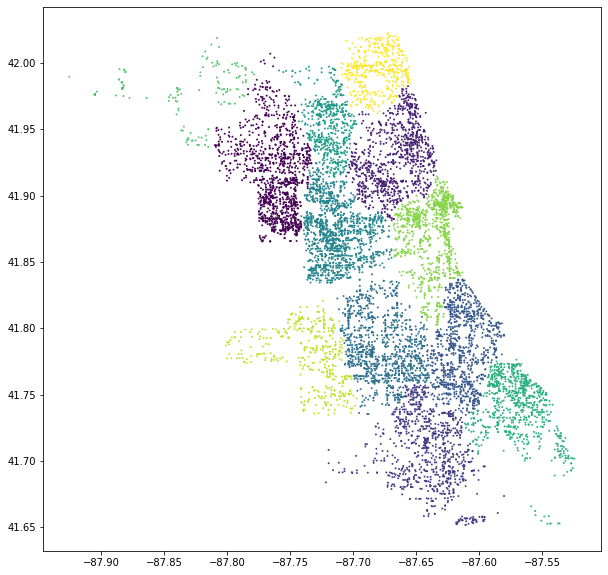

In [51]:
# it always a good idea to plot the clusters

best_model = AgglomerativeClustering(**best_params).fit(pipe.transform(data))
cluster_labels = best_model.labels_
x = data['Longitude']
y = data['Latitude']
colors = cluster_labels
plt.figure(figsize=(10,10))
plt.scatter(x, y,s =1, c=cluster_labels , alpha=.9)


plt.show()
display()


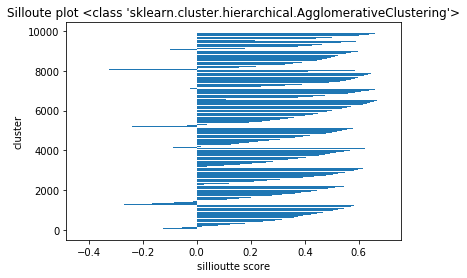

In [52]:
# get the s score for each row of data
X = pipe.transform(data)
scores = silhouette_samples(X, cluster_labels)

# create a bar plot to show each silloute
scores_df = pd.DataFrame({'scores':scores, 'labels':cluster_labels})
scores_df.sort_values(['labels', 'scores'], inplace=True)


plt.barh(range(scores_df.shape[0]), scores_df[ 'scores'])
plt.xlabel('sillioutte score')
plt.ylabel('cluster')
plt.title('Silloute plot {}'.format(type(model)))
plt.show()
display()


In [63]:
silhouette_score(X, cluster_labels)

0.3758241397906634